Initialization of Libraries

In [1]:
import sys
assert sys.version_info >= (3,5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from pandas.plotting import scatter_matrix

Part 1. Data Analysis and Bayes Net 

In [8]:
# Initialisation of Training Datasets

binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

# binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
# binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
# complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
# complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')

In [9]:
complete_x_train.head()


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [10]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [12]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [13]:
complete_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [14]:
complete_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9690 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


<Figure size 640x480 with 0 Axes>

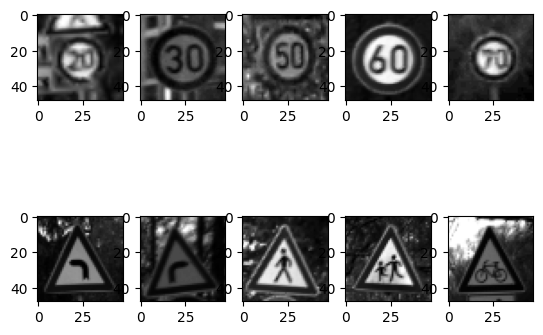

In [15]:
plt.figure()
f, axarr = plt.subplots(2,5)
axarr[0][0].imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48), cmap='gray')
axarr[0][1].imshow(complete_x_train.iloc[210].to_numpy().reshape(48,48), cmap='gray')
axarr[0][2].imshow(complete_x_train.iloc[2430].to_numpy().reshape(48,48), cmap='gray')
axarr[0][3].imshow(complete_x_train.iloc[6085].to_numpy().reshape(48,48), cmap='gray')
axarr[0][4].imshow(complete_x_train.iloc[7030].to_numpy().reshape(48,48), cmap='gray')
axarr[1][0].imshow(complete_x_train.iloc[8275].to_numpy().reshape(48,48), cmap='gray')
axarr[1][1].imshow(complete_x_train.iloc[8635].to_numpy().reshape(48,48), cmap='gray')
axarr[1][2].imshow(complete_x_train.iloc[8875].to_numpy().reshape(48,48), cmap='gray')
axarr[1][3].imshow(complete_x_train.iloc[9415].to_numpy().reshape(48,48), cmap='gray')
axarr[1][4].imshow(complete_x_train.iloc[9685].to_numpy().reshape(48,48), cmap='gray')

In [16]:
# Trying to implement backward selection for class 0-9

class_arr = [
                onevsall_y_train_0.copy(),
                onevsall_y_train_1.copy(),
                onevsall_y_train_2.copy(),
                onevsall_y_train_3.copy(),
                onevsall_y_train_4.copy(),
                onevsall_y_train_5.copy(),
                onevsall_y_train_6.copy(),
                onevsall_y_train_7.copy(),
                onevsall_y_train_8.copy(),
                onevsall_y_train_9.copy()
            ]

def inverse_num(i):
    if i == 1: return 0
    else: return 1
    
def get_all_corr(x, arr_class):
    temp_data = x.copy()
    return_arr = []

    for i in arr_class:
        temp = [[inverse_num(i[0])] for i in i.to_numpy()]
        temp_data[["Class"]] = temp
        temp_corr = temp_data.corr()
        return_arr.append(temp_corr)

    return return_arr


onevsall_corr = get_all_corr(complete_x_train,class_arr)

In [ ]:
def backward_select(corrs, num):
    return_arr = []
    ind = 0
    while(len(return_arr)<num):
        for i in corrs:
            temp_val = i["Class"].sort_values(ascending=False)[0:ind+1].index[1:].to_numpy()
            return_arr = np.unique(np.concatenate((return_arr,temp_val),0))
        ind += 1

    sorting_arr = [int(i) for i in return_arr]
    sorting_arr.sort()
    sorting_arr

    return_arr = [str(i) for i in sorting_arr]
    return return_arr

In [ ]:
len(backward_select(onevsall_corr,30))

['479',
 '509',
 '510',
 '526',
 '527',
 '560',
 '608',
 '671',
 '1030',
 '1073',
 '1074',
 '1120',
 '1121',
 '1170',
 '1268',
 '1316',
 '1317',
 '1414',
 '1419',
 '1461',
 '1462',
 '1467',
 '1468',
 '1507',
 '1508',
 '1517',
 '1666',
 '1694',
 '1695',
 '1714',
 '1715',
 '1743',
 '1744',
 '1761',
 '2213',
 '2261',
 '2262',
 '2263']